## Gradio Pets

In [ ]:
#export
from fastai.vision.all import *
import gradio as gr
import timm

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

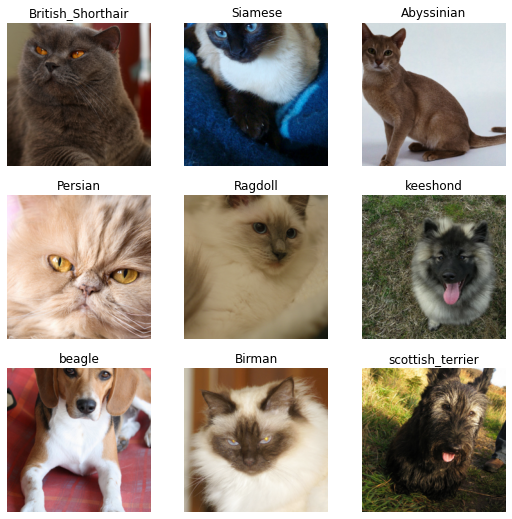

In [ ]:
dls.show_batch()

In [ ]:
learn2 = vision_learner(dls, resnet34, metrics=error_rate)
learn2.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.526944,0.335626,0.117727,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.502720,0.303855,0.095399,00:15
1,0.320419,0.226905,0.072395,00:15


In [ ]:
timm.list_models('beit*')

['beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512']

In [ ]:
learn = vision_learner(dls, 'beit_base_patch16_224_in22k', metrics=error_rate)
learn.fine_tune(2)

/home/jhoward/miniconda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,error_rate,time
0,3.390269,1.664217,0.472260,00:31


epoch,train_loss,valid_loss,error_rate,time
0,1.043460,0.354510,0.115020,00:40
1,0.533986,0.278076,0.091340,00:40


In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224, method='squish'))

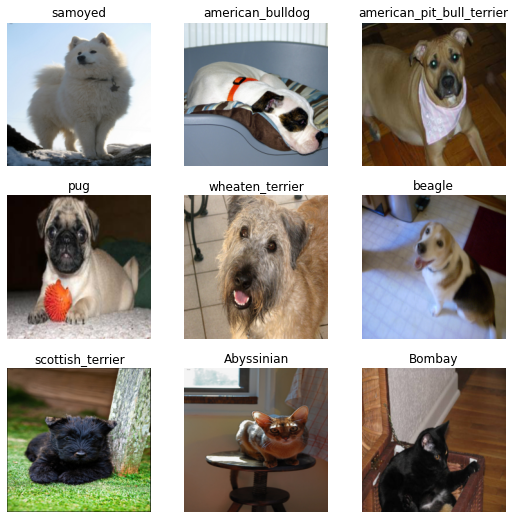

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, 'beit_base_patch16_224_in22k', metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.176875,0.232042,0.077131,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.222345,0.203408,0.063599,00:36
1,0.132689,0.173883,0.048714,00:36


In [ ]:
learn.export('model.pkl')

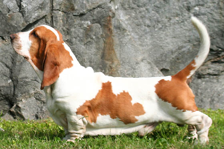

In [ ]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [ ]:
#export
learn = load_learner('model.pkl')

In [ ]:
learn.predict(im)

('basset_hound',
 TensorImage(14),
 TensorImage([2.0264e-06, 1.7458e-06, 2.2141e-06, 6.5527e-07, 6.4567e-06, 5.0958e-06,
         3.3798e-06, 3.6026e-06, 6.8579e-07, 2.7610e-07, 2.9614e-06, 2.6721e-06,
         7.5365e-06, 6.2046e-06, 9.9976e-01, 4.6037e-05, 3.6314e-06, 2.1840e-06,
         2.1958e-05, 2.2747e-05, 3.5984e-06, 7.3936e-06, 3.0173e-05, 2.7094e-06,
         1.9102e-06, 2.9396e-07, 2.0916e-06, 1.3371e-05, 5.1684e-06, 1.0600e-05,
         3.1045e-06, 1.6569e-06, 5.1186e-06, 1.3667e-06, 8.7854e-07, 3.2462e-06,
         9.5551e-06]))

In [ ]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [ ]:
classify_image(im)

{'Abyssinian': 2.0264358226995682e-06,
 'Bengal': 1.7457510921303765e-06,
 'Birman': 2.21413210965693e-06,
 'Bombay': 6.55270014249254e-07,
 'British_Shorthair': 6.4567393565084785e-06,
 'Egyptian_Mau': 5.0958442443516105e-06,
 'Maine_Coon': 3.379795089131221e-06,
 'Persian': 3.6026315228809835e-06,
 'Ragdoll': 6.857923722236592e-07,
 'Russian_Blue': 2.760983477401169e-07,
 'Siamese': 2.9613702281494625e-06,
 'Sphynx': 2.672075424925424e-06,
 'american_bulldog': 7.536450084444368e-06,
 'american_pit_bull_terrier': 6.204614237503847e-06,
 'basset_hound': 0.9997557997703552,
 'beagle': 4.603665365721099e-05,
 'boxer': 3.631427489381167e-06,
 'chihuahua': 2.1839607597939903e-06,
 'english_cocker_spaniel': 2.1958365323371254e-05,
 'english_setter': 2.2747215552954003e-05,
 'german_shorthaired': 3.5984492114948807e-06,
 'great_pyrenees': 7.393558462354122e-06,
 'havanese': 3.017312519659754e-05,
 'japanese_chin': 2.709447699089651e-06,
 'keeshond': 1.9102492387901293e-06,
 'leonberger': 2.9

In [ ]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

In [ ]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch()

In [ ]:
intf.close()

Closing server running on port: 3000


In [ ]:
import requests,base64
from PIL import Image
from io import BytesIO

In [ ]:
def data_url(filename, size=(192,192)):
    image = PILImage.create(filename)
    image.thumbnail(size)
    buff = BytesIO()
    image.save(buff, format="JPEG")
    prefix = f'data:image/{Path(filename).suffix[1:]};base64,'
    return prefix + base64.b64encode(buff.getvalue()).decode('utf-8')

In [ ]:
data = {"data": [data_url('cat.jpg')]}
res = requests.post(url='https://hf.space/embed/jph00/testing/+/api/predict/', json=data).json()
res

{'data': [{'label': 'Cat',
   'confidences': [{'label': 'Cat', 'confidence': 1.0},
    {'label': 'Dog', 'confidence': 3.827755170118796e-13}]}],
 'flag_index': None,
 'updated_state': None,
 'durations': [1.636493444442749],
 'avg_durations': [1.2002585530281067]}